In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
url = "../data/sierraleone-bumbuna.csv" 
df = pd.read_csv(url)
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [7]:
# Check how many duplicate rows exist
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("After removing duplicates:", df.shape)


Duplicate rows: 0
After removing duplicates: (525600, 19)


In [8]:
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [10]:
from scipy import stats

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[cols_to_check]))
df = df[(z_scores < 3).all(axis=1)]


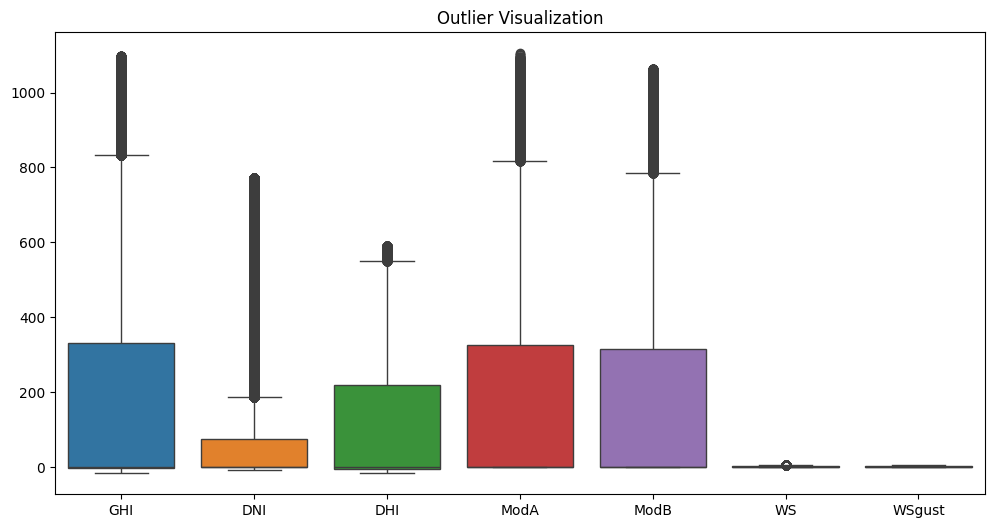

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols_to_check])
plt.title("Outlier Visualization")
plt.show()


In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.sort_values(by='Timestamp', inplace=True)

In [13]:
print(df.isna().sum())
print(df.duplicated().sum())
print(df.shape)
df.describe()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         509308
dtype: int64
0
(509308, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,509308,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,509308.000000,0.0
mean,2022-04-29 18:45:56.196957440,185.000024,104.128943,108.104278,189.764194,181.693908,26.214248,79.747674,1.089871,1.614397,0.352298,130.947234,6.962560,999.873395,0.000997,0.004159,31.959657,32.087075,NaN
min,2021-10-30 00:01:00,-15.900000,-7.800000,-16.700000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 08:28:45,-3.300000,-0.300000,-4.100000,0.000000,0.000000,23.100000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.400000,23.700000,NaN
50%,2022-04-28 22:48:30,-0.400000,-0.100000,-0.600000,1.200000,1.100000,25.100000,86.100000,0.800000,1.400000,0.400000,156.200000,5.800000,1000.000000,0.000000,0.000000,26.300000,26.500000,NaN
75%,2022-07-29 01:19:15,331.300000,74.800000,217.900000,327.200000,314.500000,29.200000,97.000000,1.900000,2.600000,0.500000,232.800000,11.800000,1001.000000,0.000000,0.000000,39.600000,40.000000,NaN
max,2022-10-30 00:00:00,1097.000000,772.300000,590.500000,1105.000000,1064.000000,39.900000,100.000000,4.800000,6.400000,2.500000,360.000000,98.400000,1006.000000,1.000000,2.000000,71.200000,70.000000,NaN
std,NaN,279.019460,200.954182,153.691835,281.888942,269.988109,4.397260,20.556188,1.155220,1.503353,0.283730,114.365092,7.455692,2.106966,0.031566,0.040205,12.029241,11.666626,NaN


In [14]:
import os

# create a folder (if it doesn't exist yet)
os.makedirs("../data_cleaned", exist_ok=True)

In [15]:
df.to_csv("../data_cleaned/sierraleone_clean.csv", index=False)
print("✅ Cleaned sierraleone data saved successfully!")

✅ Cleaned sierraleone data saved successfully!
